# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [2]:

df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')

In [3]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [4]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')

In [5]:
df_train.shape

(15223, 52)

In [6]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [7]:
df_test.shape

(14910, 52)

In [8]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [9]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [10]:
df = df_test.append(df_train).reset_index(drop=True)

In [11]:
df.shape

(30133, 53)

### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 93 columns):
TARGET                                      30133 non-null int64
AGE                                         30133 non-null int64
SOCSTATUS_WORK_FL                           30133 non-null int64
SOCSTATUS_PENS_FL                           30133 non-null int64
GENDER                                      30133 non-null int64
CHILD_TOTAL                                 30133 non-null int64
DEPENDANTS                                  30133 non-null int64
PERSONAL_INCOME                             30133 non-null float64
REG_FACT_FL                                 30133 non-null int64
FACT_POST_FL                                30133 non-null int64
REG_POST_FL                                 30133 non-null int64
REG_FACT_POST_FL                            30133 non-null int64
REG_FACT_POST_TP_FL                         30133 non-null int64
FL_PRESENCE_FL                              

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [73]:
for i in df.columns: # перебираем все столбцы
    if str(df[i].dtype) == 'object': # если тип столбца - object
        print('='*10)
        print(i) # выводим название столбца
        print(set(df[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print('\n') # выводим пустую строку

EDUCATION
{'Неполное среднее', 'Среднее специальное', 'Среднее', 'Ученая степень', 'Два и более высших образования', 'Неоконченное высшее', 'Высшее'}


MARITAL_STATUS
{'Гражданский брак', 'Разведен(а)', 'Не состоял в браке', 'Состою в браке', 'Вдовец/Вдова'}


GEN_TITLE
{'Высококвалифиц. специалист', 'Специалист', 'Партнер', 'Рабочий', 'Служащий', 'Военнослужащий по контракту', 'Другое', 'Индивидуальный предприниматель', 'Руководитель низшего звена', 'Работник сферы услуг', 'Руководитель среднего звена', 'Руководитель высшего звена'}


ORG_TP_FCAPITAL
{'Без участия', 'С участием'}


JOB_DIR
{'Адм-хоз. и трансп. службы', 'Участие в основ. деятельности', 'Реклама и маркетинг', 'Кадровая служба и секретариат', 'Служба безопасности', 'Снабжение и сбыт', 'Юридическая служба', 'Бухгалтерия, финансы, планир.', 'Вспомогательный техперсонал', 'Пр-техн. обесп. и телеком.'}


FAMILY_INCOME
{'от 20000 до 50000 руб.', 'свыше 50000 руб.', 'до 5000 руб.', 'от 5000 до 10000 руб.', 'от 10000 до 20000 р

Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

In [68]:
#узнаем название пустых колонок
df_empty = df.columns[df.isna().any()]
df_empty


Index(['PREVIOUS_CARD_NUM_UTILIZED'], dtype='object')

In [27]:
#подобьем описание
column_names1 = ''
def get_discr(i):    
    for j in df_descr[df_descr.columns[0]]:
            if i == j:                   
                df11 = df_descr[df_descr[df_descr.columns[0]]==j].loc[:,['ПОЛЕ','ОПИСАНИЕ']]
                ind = df11.index[0]
                print(df11.loc[ind,'ПОЛЕ'] +' ' + df11.loc[ind,'ОПИСАНИЕ'])                    
df_empty.map(get_discr)    

GEN_INDUSTRY отрасль работы клиента
GEN_TITLE должность
ORG_TP_STATE форма собственности компании
ORG_TP_FCAPITAL отношение к иностранному капиталу
JOB_DIR направление деятельности в нутри компании
TP_PROVINCE область торговой точки, где клиент брал последний кредит
REGION_NM регион РФ
PREVIOUS_CARD_NUM_UTILIZED количество уже утилизированных карт ( если пусто - 0) 


Index([None, None, None, None, None, None, None, None], dtype='object')

In [ ]:
да, пропуски в данных есть, если в некоторых столбцах мы можем взять среднее кол-во, например WORK_TIME,
то в отрасли работы клиента так не получится. по идее можно взять самую частую работу по признакам пола и т.д.
поле TP_PROVINCE видимо придеться оставить пустым, если он не брал кредит

In [28]:
list_of_empty_columns = []
for i in df_empty:
    list_of_empty_columns.append(i)

In [67]:
for i in list_of_empty_columns:
    print(i + '  '+ str(df[i].dtype))

GEN_INDUSTRY  object
GEN_TITLE  object
ORG_TP_STATE  object
ORG_TP_FCAPITAL  object
JOB_DIR  object
TP_PROVINCE  object
REGION_NM  object
PREVIOUS_CARD_NUM_UTILIZED  float64


In [63]:
#заполним модами пустые столбцы с текстом(наверное не хорошо)
for i in list_of_empty_columns:
    if df[i].dtype == object:        
        df[i]=df[i].fillna(df[i].mode().loc[0]) 

In [21]:
for i in list_of_empty_columns:
    if df[i].dtype == float:
        print(round(df[i].mean()))

190.0
1.0


In [25]:
#предположим среднее время работы
df['WORK_TIME'] = df['WORK_TIME'].fillna(190.0)

In [134]:
#здесь возьмем 0 - не брал карту
df['PREVIOUS_CARD_NUM_UTILIZED'] = df['PREVIOUS_CARD_NUM_UTILIZED'].fillna(0)

#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

In [ ]:
есть категоральные признаки, например все текстовые и числовые, где мало уникальных значений
будем кодировать!

In [70]:
#удалим адреса и более полные категории
df = df.drop(['GEN_INDUSTRY','REG_ADDRESS_PROVINCE','FACT_ADDRESS_PROVINCE','POSTAL_ADDRESS_PROVINCE','TP_PROVINCE'],axis=1)

In [72]:
df = df.drop('ORG_TP_STATE',axis=1)

In [75]:
for i in df.columns:
    if df[i].dtype==object:
        print(i)

EDUCATION
MARITAL_STATUS
GEN_TITLE
ORG_TP_FCAPITAL
JOB_DIR
FAMILY_INCOME
REGION_NM
sample


In [99]:
#сперва думал перевести в цифры
df = pd.get_dummies(df, columns=['FAMILY_INCOME'])

In [80]:
df = pd.get_dummies(df, columns=['GEN_TITLE', 'ORG_TP_FCAPITAL','ORG_TP_FCAPITAL','JOB_DIR','REGION_NM'])

In [100]:
df.head()

,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,PERSONAL_INCOME,REG_FACT_FL,FACT_POST_FL,...,REGION_NM_УРАЛЬСКИЙ,REGION_NM_ЦЕНТРАЛЬНЫЙ 1,REGION_NM_ЦЕНТРАЛЬНЫЙ 2,REGION_NM_ЦЕНТРАЛЬНЫЙ ОФИС,REGION_NM_ЮЖНЫЙ,FAMILY_INCOME_до 5000 руб.,FAMILY_INCOME_от 10000 до 20000 руб.,FAMILY_INCOME_от 20000 до 50000 руб.,FAMILY_INCOME_от 5000 до 10000 руб.,FAMILY_INCOME_свыше 50000 руб.
0,0,30,1,0,1,1,1,7000.0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,0,48,0,1,1,0,0,4100.0,1,1,...,0,1,0,0,0,0,1,0,0,0
2,0,35,1,0,0,1,0,40000.0,1,1,...,0,0,1,0,0,0,0,1,0,0
3,0,22,1,0,0,0,0,20000.0,1,1,...,0,0,0,0,0,0,0,1,0,0
4,0,27,1,0,1,2,2,17000.0,1,1,...,0,0,0,0,0,0,0,1,0,0


#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [17]:
str1 = '`CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`'
str1 = str1.replace('`', "'")
str1 = str1.replace("'", '')
str1 = str1.replace(' ', '')


In [18]:
List = str1.split(sep=',')

In [19]:
List.append('PERSONAL_INCOME')

In [20]:
for i in List:
    df[i] = df[i].map(lambda x: x.replace(',', '.')).astype('float')
    print(i)

CREDIT
FST_PAYMENT
LOAN_AVG_DLQ_AMT
LOAN_MAX_DLQ_AMT
PERSONAL_INCOME


In [78]:
df = df.drop(['AGREEMENT_RK'],axis=1)

In [ ]:
def preproc_data(df_input):
    df_output = df_input.copy()
    df_output = df_output.drop(['AGREEMENT_RK'],axis=1)
    for i in List:
        df_output[i] = df_output[i].map(lambda x: x.replace(',', '.')).astype('float')

    ## Your Code Here
    
    return df_output

In [69]:
for i in df.columns:
    if df[i].dtype==object:
        print(i)

EDUCATION
MARITAL_STATUS
GEN_INDUSTRY
GEN_TITLE
ORG_TP_STATE
ORG_TP_FCAPITAL
JOB_DIR
FAMILY_INCOME
REG_ADDRESS_PROVINCE
FACT_ADDRESS_PROVINCE
POSTAL_ADDRESS_PROVINCE
TP_PROVINCE
REGION_NM
sample


In [102]:
df.query('sample == "test"')

,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,PERSONAL_INCOME,REG_FACT_FL,FACT_POST_FL,...,REGION_NM_УРАЛЬСКИЙ,REGION_NM_ЦЕНТРАЛЬНЫЙ 1,REGION_NM_ЦЕНТРАЛЬНЫЙ 2,REGION_NM_ЦЕНТРАЛЬНЫЙ ОФИС,REGION_NM_ЮЖНЫЙ,FAMILY_INCOME_до 5000 руб.,FAMILY_INCOME_от 10000 до 20000 руб.,FAMILY_INCOME_от 20000 до 50000 руб.,FAMILY_INCOME_от 5000 до 10000 руб.,FAMILY_INCOME_свыше 50000 руб.
0,0,30,1,0,1,1,1,7000.0,0,1,...,0,0,0,0,0,0,1,0,0,0
1,0,48,0,1,1,0,0,4100.0,1,1,...,0,1,0,0,0,0,1,0,0,0
2,0,35,1,0,0,1,0,40000.0,1,1,...,0,0,1,0,0,0,0,1,0,0
3,0,22,1,0,0,0,0,20000.0,1,1,...,0,0,0,0,0,0,0,1,0,0
4,0,27,1,0,1,2,2,17000.0,1,1,...,0,0,0,0,0,0,0,1,0,0
5,0,44,0,1,0,2,2,7000.0,1,1,...,0,0,0,0,0,0,1,0,0,0
6,0,57,1,0,1,0,0,10000.0,1,1,...,1,0,0,0,0,0,1,0,0,0
7,0,33,1,0,1,2,2,7500.0,1,1,...,0,0,0,0,0,0,1,0,0,0
8,0,53,0,1,1,2,0,9000.0,1,1,...,0,0,0,0,0,0,1,0,0,0
9,1,33,1,0,0,1,0,4000.0,1,1,...,0,0,0,0,0,0,0,0,1,0


In [136]:
#df_preproc = df.pipe(preproc_data)

df_train_preproc = df.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df.query('sample == "test"').drop(['sample'], axis=1)

In [137]:
df_train_preproc.head()

,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,PERSONAL_INCOME,REG_FACT_FL,FACT_POST_FL,...,REGION_NM_УРАЛЬСКИЙ,REGION_NM_ЦЕНТРАЛЬНЫЙ 1,REGION_NM_ЦЕНТРАЛЬНЫЙ 2,REGION_NM_ЦЕНТРАЛЬНЫЙ ОФИС,REGION_NM_ЮЖНЫЙ,FAMILY_INCOME_до 5000 руб.,FAMILY_INCOME_от 10000 до 20000 руб.,FAMILY_INCOME_от 20000 до 50000 руб.,FAMILY_INCOME_от 5000 до 10000 руб.,FAMILY_INCOME_свыше 50000 руб.
14910,0,49,1,0,1,2,1,5000.0,1,1,...,0,0,0,0,0,0,1,0,0,0
14911,0,32,1,0,1,3,3,12000.0,1,1,...,0,0,0,0,1,0,1,0,0,0
14912,0,52,1,0,1,4,0,9000.0,1,1,...,0,0,0,0,0,0,1,0,0,0
14913,0,39,1,0,1,1,1,25000.0,0,1,...,0,0,0,0,1,0,0,1,0,0
14914,0,30,1,0,0,0,0,12000.0,1,1,...,0,0,0,0,1,0,1,0,0,0


#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [189]:
y = df_train_preproc['TARGET']
y_test = df_test_preproc['TARGET']

In [147]:
X = df_train_preproc.drop('TARGET',axis=1)

In [146]:
X_test = df_test_preproc.drop('TARGET',axis=1)

#### Задание 5. Обучение и оценка качества разных моделей

In [148]:
from sklearn.model_selection import train_test_split
# test_size=0.3, random_state=42
X_train_cross, X_test_cross, y_train_cross, y_test_cross = train_test_split(X, y, test_size=0.33, random_state=42)


In [151]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
# Постепенно мы узнаем, что они делают а сейчас учимся понимать какой работает качественнее
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

model_tree = DecisionTreeClassifier()
model_tree.fit(X_train_cross, y_train_cross)
predict_tree = model_tree.predict(X_test_cross)
#"""
model_ens = RandomForestClassifier()
model_ens.fit(X_train_cross, y_train_cross)
predict_ens = model_ens.predict(X_test_cross)


model_regr = LogisticRegression()
model_regr.fit(X_train_cross, y_train_cross)
predict_regr = model_regr.predict(X_test_cross)
#"""

c:\users\yurki\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\yurki\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [157]:
# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score

print('tree____')
print('precision', precision_score(y_test_cross, predict_tree))
print('recall', recall_score(y_test_cross, predict_tree))
print('accuracy', accuracy_score(y_test_cross, predict_tree))
print('f1', f1_score(y_test_cross, predict_tree))

print('forest____')
print('precision', precision_score(y_test_cross, predict_ens))
print('recall', recall_score(y_test_cross, predict_ens))
print('accuracy', accuracy_score(y_test_cross, predict_ens))
print('f1', f1_score(y_test_cross, predict_ens))

print('regresion____')
print('precision', precision_score(y_test_cross, predict_regr))
print('recall', recall_score(y_test_cross, predict_regr))
print('accuracy', accuracy_score(y_test_cross, predict_regr))
print('f1', f1_score(y_test_cross, predict_regr))

tree____
precision 0.15210843373493976
recall 0.16557377049180327
accuracy 0.7866242038216561
f1 0.15855572998430142
forest____
precision 0.3793103448275862
recall 0.018032786885245903
accuracy 0.8771894904458599
f1 0.03442879499217528
regresion____
precision 0.4
recall 0.003278688524590164
accuracy 0.8783837579617835
f1 0.006504065040650406


In [169]:
predict_proba_tree = model_tree.predict_proba(X_test_cross)
predict_proba_ens = model_ens.predict_proba(X_test_cross)
predict_proba_regr = model_regr.predict_proba(X_test_cross)


(-0.01, 1.01)

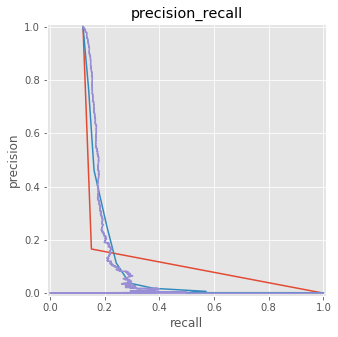

In [170]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально сравнить)
# Возможно вас удивит качество! Но задача подобрана специально ;) Такое качество тоже бывает
from sklearn.metrics import precision_recall_curve


precision1, recall1, _  = precision_recall_curve(y_test_cross, predict_proba_tree[:,1])
precision2, recall2, _  = precision_recall_curve(y_test_cross, predict_proba_ens [:,1])
precision3, recall3, _  = precision_recall_curve(y_test_cross, predict_proba_regr [:,1])
plt.figure(figsize=(5, 5))
plt.plot(precision1, recall1)
plt.plot(precision2, recall2)
plt.plot(precision3, recall3)
plt.ylabel('precision')
plt.xlabel('recall')
plt.grid(True)
plt.title('precision_recall')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

0.5190125309187607
0.5965926225794231
0.6384436257214376


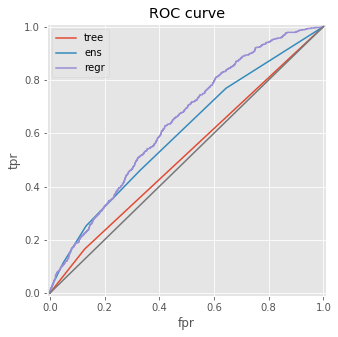

In [186]:
# Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой моделе
# Подпишите оси и линии

from sklearn.metrics import roc_auc_score, roc_curve

fpr1, tpr1, _  = roc_curve(y_test_cross, predict_proba_tree[:,1])
fpr2, tpr2, _  = roc_curve(y_test_cross, predict_proba_ens [:,1])
fpr3, tpr3, _  = roc_curve(y_test_cross, predict_proba_regr [:,1])


print(roc_auc_score(y_test_cross, predict_proba_tree[:,1]))
print(roc_auc_score(y_test_cross, predict_proba_ens [:,1]))
print(roc_auc_score(y_test_cross, predict_proba_regr[:,1]))
plt.figure(figsize=(5, 5))
plt.plot(fpr1, tpr1, label='tree')
plt.plot(fpr2, tpr2, label='ens')
plt.plot(fpr3, tpr3, label='regr')
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))
plt.legend()
plt.show()

In [195]:
from sklearn.model_selection import cross_val_score
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc

tree = DecisionTreeClassifier()
list1=cross_val_score(
    tree,
    X,
    y,
    scoring='roc_auc',
    cv=10
)
print(list1)
print(list1.mean())

[0.53756489 0.52550786 0.54860313 0.51987673 0.52996032 0.5662283
 0.5401634  0.5129964  0.51889412 0.52658814]
0.5326383306851471


In [196]:
rfc = RandomForestClassifier()
list1=cross_val_score(
    rfc,
    X,
    y,
    scoring='roc_auc',
    cv=10
)
print(list1)
print(list1.mean())

c:\users\yurki\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\yurki\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\yurki\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\yurki\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in versio

[0.60246516 0.57819939 0.56189617 0.58795283 0.60204515 0.60156929
 0.58871297 0.56571537 0.59140742 0.60617334]
0.5886137088179704


In [197]:
regr = LogisticRegression()
list1=cross_val_score(
    regr,
    X,
    y,
    scoring='roc_auc',
    cv=10
)
print(list1)
print(list1.mean())

c:\users\yurki\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\yurki\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\yurki\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\yurki\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\yurki\appdata\local\programs\python\python37\lib\si

[0.65250733 0.61878949 0.63379353 0.64333123 0.65650685 0.58456417
 0.63086012 0.64905385 0.64971305 0.67551221]
0.6394631839169405


In [200]:
# Взять лучшую модель и сделать предсказания (с вероятностями (!!!)) для test выборки
#лучшая оказалась регрессия 0.639
#model_regr_test = LogisticRegression() # этого не надо так как мы уже обучили модель, зачем новую еще обучать
#model_regr_test.fit(X_test, y_test)
predict_regr_test = model_regr.predict_proba(X_test)

## Your Code Here

In [201]:
predict_regr_test

array([[0.83192434, 0.16807566],
       [0.94617199, 0.05382801],
       [0.82342624, 0.17657376],
       ...,
       [0.81090709, 0.18909291],
       [0.95900402, 0.04099598],
       [0.81246122, 0.18753878]])

0.6210147199305254


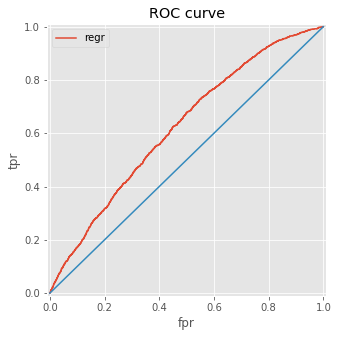

In [199]:
# Померить roc_auc на тесте
# Вывести текстом и на графике =)

print(roc_auc_score(y_test, predict_regr_test[:,1]))
plt.figure(figsize=(5, 5))
fpr_test, tpr_test, _  = roc_curve(y_test, predict_regr_test [:,1])
plt.plot(fpr_test, tpr_test, label='regr')
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))
plt.legend()
plt.show()
#в в итоге, у нас будет вероятность таргета только для индекса? мы же удаляем все строковые данные и id?
#мы потом сможем выбрать конкретного человека и отправрить ему, условно, рекламу?

### Больше обязательных заданий нет, но ниже вы можете провести исследование, поиграться с данными
### Это возможность написать код, который я посмотрю и в случае чего откомметирую. ;)
### Это не оценивается и остается на ваше усмотрение. Просто дополнительная возможность

In [1]:
### И далее ;)